In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
x.shape, y.shape

((70000, 784), (70000,))

In [7]:
import matplotlib.pyplot as plt
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [8]:
some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)

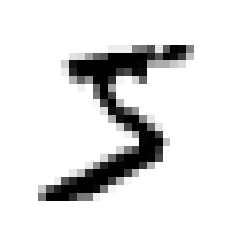

In [9]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.84212782, 0.87416296, 0.83129755])

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf = RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = [
    {'n_estimators' : [100, 200, 500],
    'max_leaf_nodes' : [5, 10, 16]}
]

In [21]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

In [22]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [23]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
cvres = grid_search.cv_results_

In [25]:
cvres

{'mean_fit_time': array([ 7.83106904, 16.12852583, 38.12094264, 10.44017715, 20.60245667,
        50.19294519, 12.30695639, 24.61501398, 58.59450531]),
 'std_fit_time': array([0.32181589, 0.65040296, 0.3324544 , 0.31395379, 0.53030481,
        1.26274846, 0.2225789 , 0.7198201 , 0.64871104]),
 'mean_score_time': array([0.16474566, 0.32687039, 0.61590242, 0.18971596, 0.33518405,
        0.77537322, 0.21368461, 0.36491098, 0.87998285]),
 'std_score_time': array([0.01946059, 0.06283492, 0.00944263, 0.00730473, 0.02147589,
        0.05986188, 0.0130287 , 0.01082182, 0.07454368]),
 'param_max_leaf_nodes': masked_array(data=[5, 5, 5, 10, 10, 10, 16, 16, 16],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 500, 100, 200, 500, 100, 200, 500],
              mask=[False, False, False, False, False, False, False, False,
                   

In [26]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.6825714285714286 {'max_leaf_nodes': 5, 'n_estimators': 100}
0.6848035714285714 {'max_leaf_nodes': 5, 'n_estimators': 200}
0.6835 {'max_leaf_nodes': 5, 'n_estimators': 500}
0.7752857142857141 {'max_leaf_nodes': 10, 'n_estimators': 100}
0.77825 {'max_leaf_nodes': 10, 'n_estimators': 200}
0.7809999999999999 {'max_leaf_nodes': 10, 'n_estimators': 500}
0.8211428571428574 {'max_leaf_nodes': 16, 'n_estimators': 100}
0.8233035714285715 {'max_leaf_nodes': 16, 'n_estimators': 200}
0.8244642857142856 {'max_leaf_nodes': 16, 'n_estimators': 500}


In [29]:
rf_clf2 = RandomForestClassifier(n_estimators=1000, max_leaf_nodes= 16, n_jobs=-1, random_state=42)

In [31]:
cross_val_score(rf_clf2, x_train, y_train, cv=3)

array([0.8258424 , 0.82530669, 0.82417229])

In [33]:
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
sgd_clf.predict(x_test)

array(['8', '4', '5', ..., '8', '7', '1'], dtype='<U1')

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
x_train_scaled = scaler.fit_transform(x_train
                                    )

In [38]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

/Users/wonhee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wonhee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wonhee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91059088, 0.90625167, 0.90147862])

In [40]:
sgd_clf2 = SGDClassifier(max_iter=1000, penalty='l2')

In [41]:
cross_val_score(sgd_clf2, x_train_scaled, y_train, cv=3, scoring='accuracy')

/Users/wonhee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90834092, 0.9047517 , 0.90517518])